Getting started with the linear advection model
=============================================================

Author: Philipp Griewank

Basic starting point to get to know the linear advection model. More documentation to come here, but for now this is your starting point to understanding the model and it's core features


## ToDo

## Done


In [2]:
import numpy as np
from da_functions import *
from model_functions import *
from plot_functions import *
import matplotlib.pyplot as plt

## Run the model with default values and plot the first 5 timesteps

In [3]:
"""
initialize model and data assimilation setup using the default values
"""

m_const = set_model_constants()#u=2.3,nx=101)#,u_std=1.5)#,dx=1,u=1,u_std=0,dhdt=0,dhdt_std = 0,h_init_std = 50)
da_const = set_da_constants()#nens=100,ncyc=60,nexp=1)#,u_std=0.01)#,obs_loc_h = np.arange(0,11))
#nens=10,dt = 50)

In [4]:
states = run_linear_advection_KF(m_const,da_const)

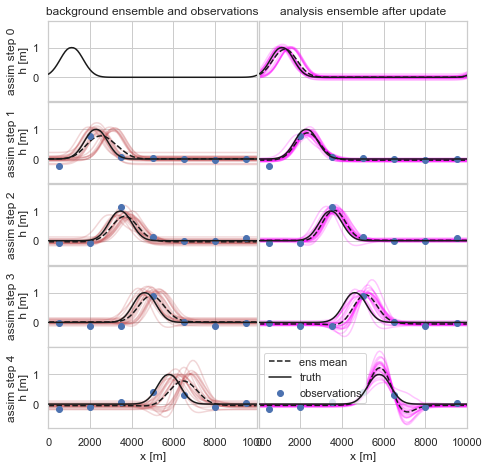

In [5]:
fig, ax = ensemble_plotter(states,m_const,da_const,t_start=0,t_end=5)


## Compute and plot RMSE and ensemble spread 

In [5]:
"""
Compute scores 
"""
rmse, spread = get_spread_and_rmse(states,da_const,m_const)

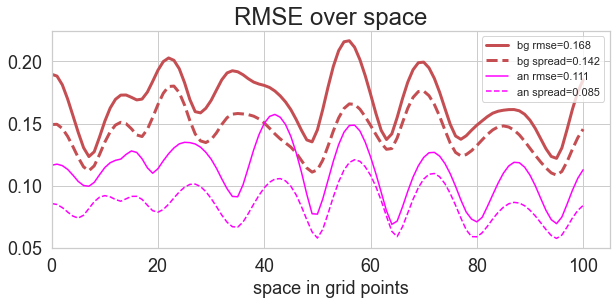

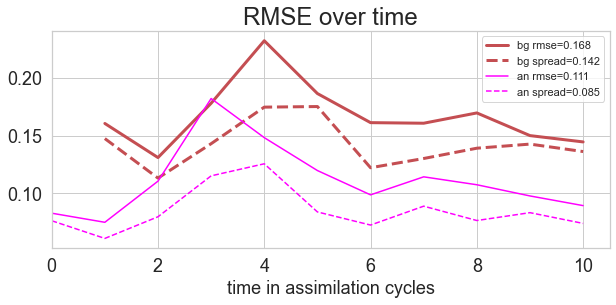

In [6]:
"""
plot RMSE over time and over space
"""
f = plot_scores_spread(rmse,spread)

In [ ]:
## Adding a blind forecast and calculating a response function

In [7]:
states = add_blind_forecast(states,m_const,da_const)

In [8]:
def sum_mid_tri(x):
    nx = len(x)
    idx_str = int(nx/3.)
    idx_end = int(2*nx/3.)
    return np.sum(x[idx_str:idx_end])

In [9]:
states = add_response(states,sum_mid_tri)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='assimilation step', ylabel='PDF of response function J'>)

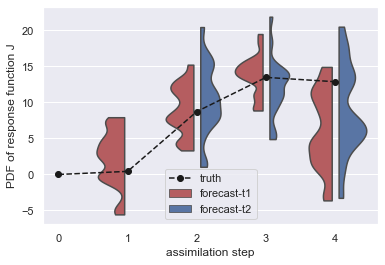

In [10]:
plot_response_function_pdf_split(states,t_end = 5,right_var='bf')

In [ ]:
## Compute and plot RMSE and ensemble spread with blind forecast as well

In [11]:
"""
Compute scores 
"""
rmse, spread = get_spread_and_rmse(states,da_const,m_const)

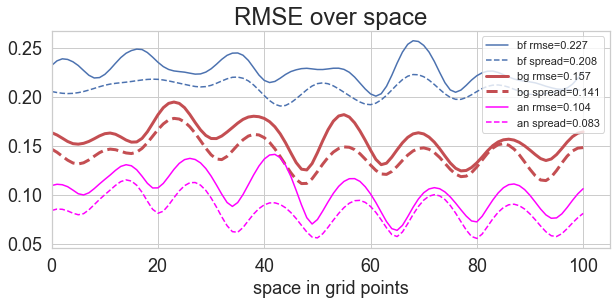

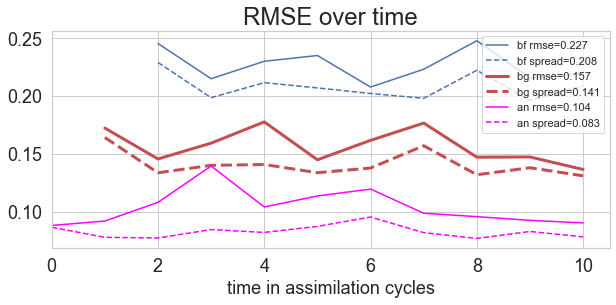

In [12]:
"""
plot RMSE over time and over space
"""
f = plot_scores_spread(rmse,spread)

## Plotting some covariance matrices for fun

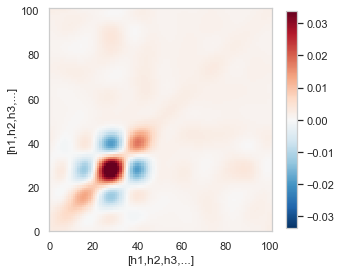

In [13]:
fig, ax = B_plotter(states,ncyc=10,matrix="an")

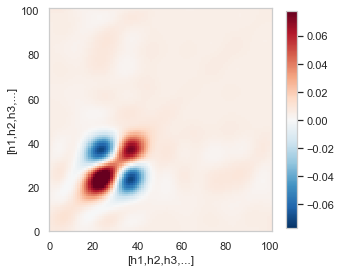

In [14]:
fig, ax = B_plotter(states,ncyc=10,matrix="bg")

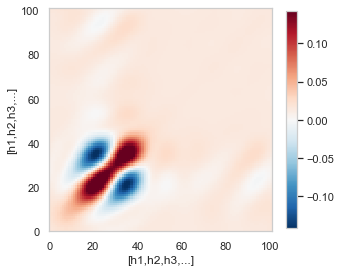

In [15]:
fig, ax = B_plotter(states,ncyc=10,matrix="bf")

# Applying localization

Example of how the EnKF is affected by a gaussian localization of the observation. Observation points are slighly staggered to highlight effects.  

Please note that in the linear advection model localization does not reduce the model error. It is intended as a test and localization 

In [16]:
"""
"""
m_const = set_model_constants(u=3.3,nx=101)
da_const_loc = set_da_constants(nens=30,ncyc=100,dhdt_std=0.0001,u_std=1.0,obs_loc_h=np.array([7,20,30,50,60,70,75,90,91]))
da_const     = set_da_constants(nens=30,ncyc=100,dhdt_std=0.0001,u_std=1.0,obs_loc_h=np.array([7,20,30,50,60,70,75,90,91]))
da_const_loc['loc']=True
da_const_loc['loc_length']=500

In [18]:
states     = run_linear_advection_KF(m_const,da_const)
states_loc = run_linear_advection_KF(m_const,da_const_loc)

## Plot timesteps

(-0.4, 1.4)

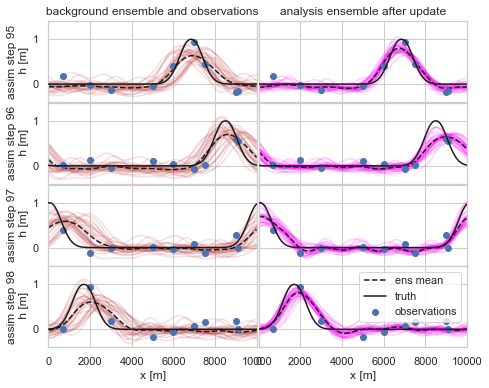

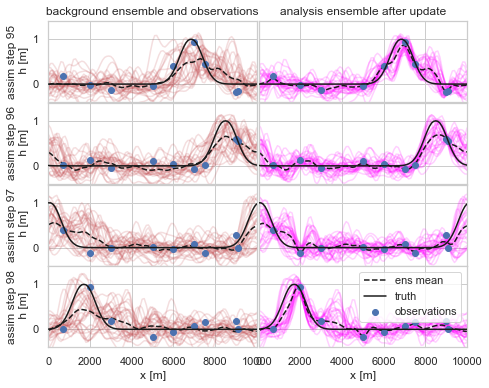

In [19]:
fig1, ax = ensemble_plotter(states    ,m_const,da_const,t_start=95,t_end=99)
ax[0,0].set_ylim(-0.4,1.4)
fig2, ax = ensemble_plotter(states_loc,m_const,da_const,t_start=95,t_end=99)
ax[0,0].set_ylim(-0.4,1.4)


## Compute and plot RMSE and ensemble spread with and without localization

In [20]:
"""
Compute scores 
"""
rmse, spread = get_spread_and_rmse(states,da_const,m_const)
rmse_loc, spread_loc = get_spread_and_rmse(states_loc,da_const_loc,m_const)

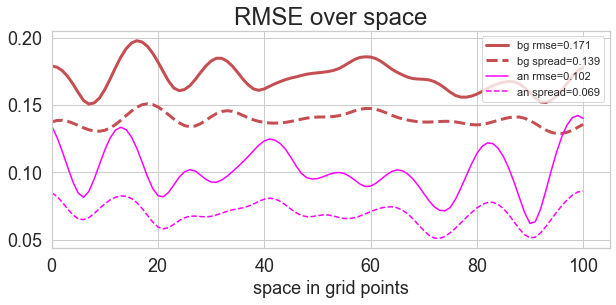

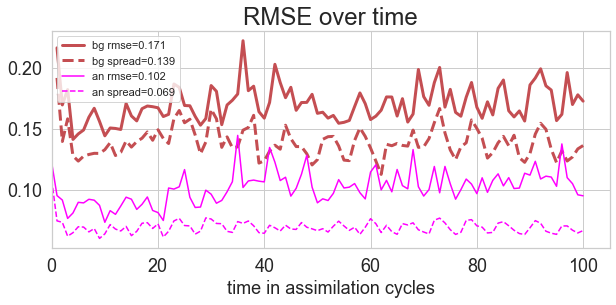

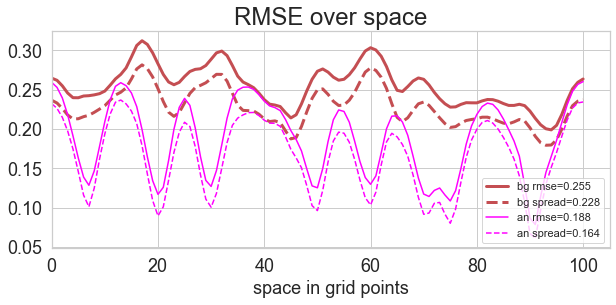

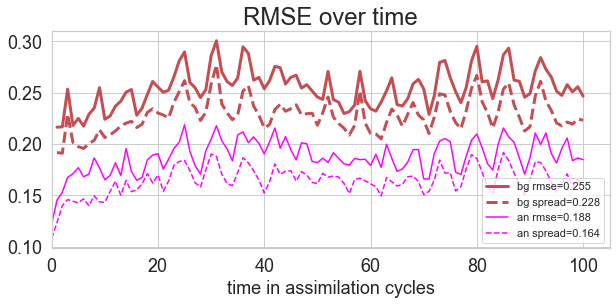

In [21]:
"""
plot RMSE over time and over space
"""
f = plot_scores_spread(rmse,spread)
f = plot_scores_spread(rmse_loc,spread_loc)

## Run the model with a much slower localized LETKF instead with randomized observation locations,  and plot the first 5 timesteps

In [22]:
np.random.seed(10)
randomized_obs_loc = np.random.choice(np.arange(m_const['nx']), 10, replace=False)
randomized_obs_loc.sort()
da_const_LETKF = set_da_constants(method='LETKF',loc=True, loc_length=500,obs_loc_h=randomized_obs_loc)#nens=100,ncyc=60,nexp=1)#,u_std=0.01)#,obs_loc_h = np.arange(0,11))

In [23]:
states_LETKF = run_linear_advection_KF(m_const,da_const_LETKF)

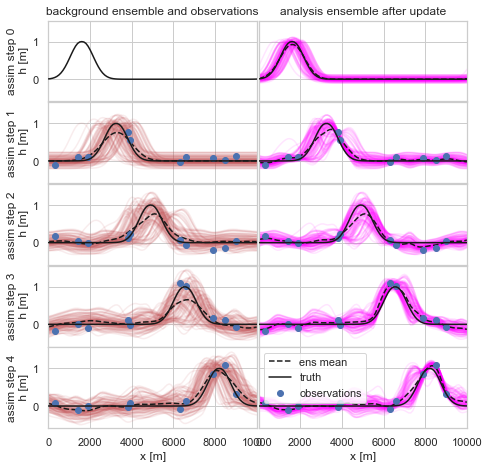

In [24]:
fig, ax = ensemble_plotter(states_LETKF,m_const,da_const_LETKF,t_start=0,t_end=5)


## Adding a blind forecast and calculating a response function

In [28]:
states_LETKF = add_blind_forecast(states_LETKF,m_const,da_const_LETKF)

In [29]:
states_LETKF = add_response(states_LETKF,sum_mid_tri)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='assimilation step', ylabel='PDF of response function J'>)

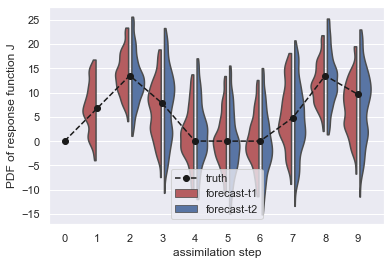

In [31]:
plot_response_function_pdf_split(states_LETKF,t_end = 10,right_var='bf')

## Compute and plot RMSE and ensemble spread with blind forecast as well

In [32]:
"""
Compute scores 
"""
rmse, spread = get_spread_and_rmse(states_LETKF,da_const_LETKF,m_const)

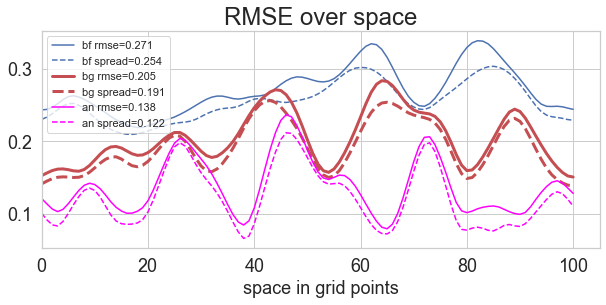

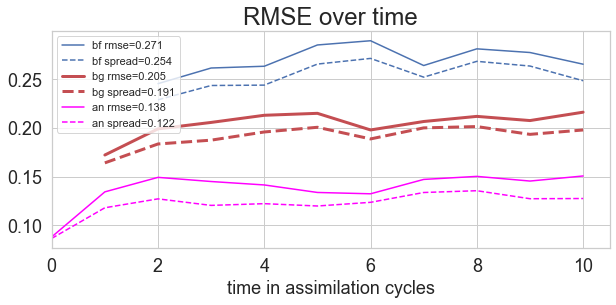

In [33]:
"""
plot RMSE over time and over space
"""
f = plot_scores_spread(rmse,spread)